In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv


In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
# df.isnull().sum().sum()
# df.duplicated().sum()
df['fbs'].value_counts()

fbs
0    254
1     43
Name: count, dtype: int64

In [5]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [6]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-12-26 19:04:49.668530: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766775889.913214      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766775889.984927      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766775890.556725      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766775890.556780      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766775890.556783      17 computation_placer.cc:177] computation placer alr

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [10]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
x_train_scaled

array([[ 1.48593388,  0.6671746 ,  0.90611854, ...,  0.68062121,
         1.500381  ,  1.28204232],
       [-0.07528481,  0.6671746 , -0.13132153, ...,  2.3266133 ,
         0.38916132, -0.83533768],
       [ 0.37077767, -1.49885801,  0.90611854, ...,  0.68062121,
         1.500381  ,  0.22335232],
       ...,
       [ 2.37805884, -1.49885801, -0.13132153, ...,  0.68062121,
        -0.72205836, -0.83533768],
       [ 0.14774643,  0.6671746 ,  0.90611854, ...,  2.3266133 ,
        -0.72205836,  1.28204232],
       [ 0.14774643, -1.49885801, -1.1687616 , ...,  0.68062121,
        -0.72205836, -0.83533768]])

In [12]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-26 19:05:09.168916: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [15]:
history = model.fit(x_train_scaled, y_train, epochs = 25, validation_split=0.2)

Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3935 - loss: 0.7710 - val_accuracy: 0.3542 - val_loss: 0.7781
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4474 - loss: 0.7558 - val_accuracy: 0.4167 - val_loss: 0.7509
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4562 - loss: 0.7352 - val_accuracy: 0.4375 - val_loss: 0.7275
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5299 - loss: 0.6999 - val_accuracy: 0.5417 - val_loss: 0.7062
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4989 - loss: 0.6940 - val_accuracy: 0.5625 - val_loss: 0.6864
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5887 - loss: 0.6585 - val_accuracy: 0.6042 - val_loss: 0.6683
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6096 - loss: 0.6500 - val_accuracy: 0.6042 - val_loss: 0.6517
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6713 - loss: 0.6141 - val_accuracy: 0.6458 - val_loss: 0.6357


In [16]:
y_pred = model.predict(x_test_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


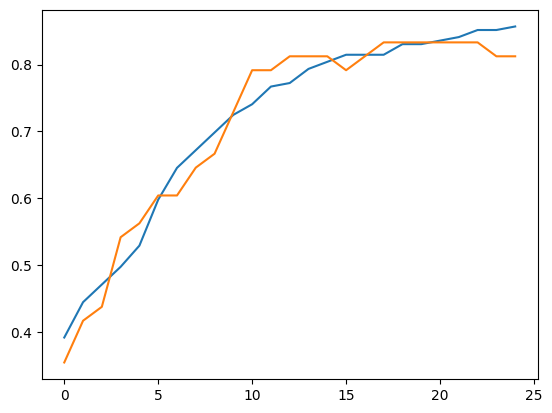

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


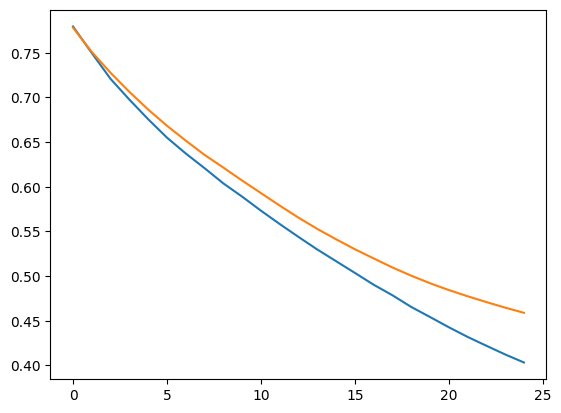

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])